# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import differential_evolution
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
from matplotlib import pyplot

%matplotlib inline

In [2]:
# определим функцию для минимизации

def obj1(x):
    return x[0]**2.0 + x[1]**2.0

bounds = [(-10, 10), (-10, 10)]

In [3]:
result = differential_evolution(obj1, bounds, strategy='best1exp', popsize=15, tol=0.01, mutation=0.5, recombination=0.7, seed=42, updating='immediate')
result

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 2703
     nit: 89
 success: True
       x: array([0., 0.])

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

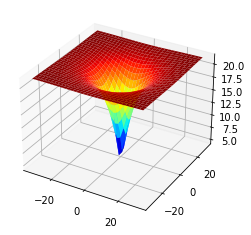

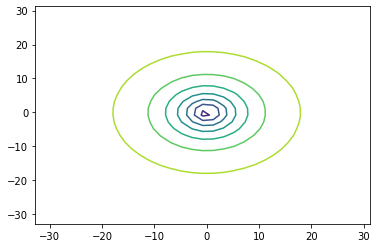

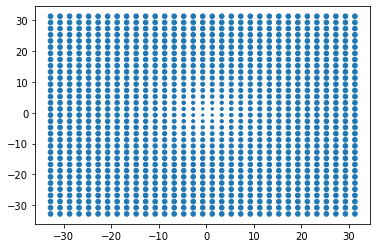

In [4]:
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
import matplotlib.pyplot as plt
 
def objective(x, y):
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2)))-exp(0.5 * (cos(2 *
  pi * x)+cos(2 * pi * y))) + e + 20
 
 
r_min, r_max = -32.768, 32.768
xaxis = arange(r_min, r_max, 2.0)
yaxis = arange(r_min, r_max, 2.0)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
figure = plt.figure()
axis = figure.gca( projection='3d')
axis.plot_surface(x, y, results, cmap='jet', shade= "false")
plt.show()
plt.contour(x,y,results)
plt.show()
plt.scatter(x, y, results)
plt.show()
 

#### Пример реализации алгоритма дифференциальной эволюции

In [5]:
# определим функцию для минимизации

def obj(x):
    return x[0]**2.0 + x[1]**2.0

In [6]:
# Процесс мутации выполняется функцией mutation, которой мы передаем a, b, c и F в качестве входных аргументов.

def mutation(x, F):
    return x[0] + F * (x[1] - x[2])

Поскольку мы работаем в ограниченном диапазоне значений, нам необходимо проверить, находится ли вновь измененный вектор также в указанных границах, и, если нет, при необходимости обрезать его значения до верхнего или нижнего пределов. Эта проверка выполняется функцией check_bounds.

In [7]:
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound

На следующем этапе выполняется кроссовер, где конкретные значения текущего, целевого и вектора заменяются соответствующими значениями в измененном векторе, чтобы создать пробный вектор. Решение о том, какие значения заменить, зависит от того, падает ли равномерное случайное значение, сгенерированное для каждой входной переменной, ниже скорости пересечения. Если это так, то соответствующие значения из измененного вектора копируются в целевой вектор.

Процесс кроссовера реализуется функцией crossover (), которая принимает в качестве входных данных мутированный и целевой векторы, а также скорость кроссовера, cr ∈ [0, 1], и количество входных переменных.

In [8]:
def crossover(mutated, target, dims, cr):
    # генерация случайного значения для каждого измерения
    p = rand(dims)
    # генерация пробного вектора с помощью биномиального кроссовера
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial
 

Iteration: 0 f([[ 1.06198 -1.46454]]) = 3.27267
Iteration: 1 f([[1.06198 1.20948]]) = 2.59063
Iteration: 3 f([[0.44806 1.20948]]) = 1.66359
Iteration: 5 f([[-0.53376  0.5889 ]]) = 0.63171
Iteration: 6 f([[0.23986 0.62782]]) = 0.45169
Iteration: 8 f([[-0.27482 -0.53898]]) = 0.36602
Iteration: 9 f([[ 0.36933 -0.41676]]) = 0.31010
Iteration: 10 f([[-0.43733 -0.28128]]) = 0.27037
Iteration: 11 f([[ 0.06377 -0.08443]]) = 0.01120
Iteration: 16 f([[-0.04572 -0.08443]]) = 0.00922
Iteration: 17 f([[-0.0612  -0.02296]]) = 0.00427
Iteration: 18 f([[0.00109 0.00872]]) = 0.00008
Iteration: 22 f([[ 0.00164 -0.00689]]) = 0.00005
Iteration: 26 f([[0.00164 0.004  ]]) = 0.00002
Iteration: 28 f([[-0.00038  0.00118]]) = 0.00000
Iteration: 31 f([[-6.00e-05 -1.03e-03]]) = 0.00000
Iteration: 32 f([[-0.00017 -0.00019]]) = 0.00000
Iteration: 34 f([[-3.e-05 -1.e-04]]) = 0.00000
Iteration: 40 f([[-5.e-05 -0.e+00]]) = 0.00000
Iteration: 41 f([[ 1.e-05 -3.e-05]]) = 0.00000
Iteration: 42 f([[ 0.e+00 -3.e-05]]) = 0.

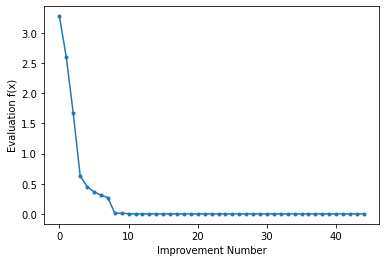

In [9]:
def differential_evolution(pop_size, bounds, iter, F, cr):
    # случайным образом создается совокупность возможных решений в указанных пределах
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    # оценивается начальную совокупность возможных решений
    obj_all = [obj(ind) for ind in pop]
    # поиск наилучшего вектора начальной популяции
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj
    # создаем список для хранения значения целевой функции на каждой итерации
    obj_iter = list()
    # алгоритм поиска
    for i in range(iter):
        # поиск всех возможных решений
        for j in range(pop_size):
            # выбор трех кандидатов, a, b и c, которые не являются текущими
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            # осуществление мутации
            mutated = mutation([a, b, c], F)
            # проверка того, что нижняя и верхняя границы сохраняются после мутации
            mutated = check_bounds(mutated, bounds)
            # кроссовер
            trial = crossover(mutated, pop[j], len(bounds), cr)
            # вычисление значения целевой функции для целевого вектора
            obj_target = obj(pop[j])
            # вычисление значения целевой функции для пробного вектора
            obj_trial = obj(trial)
            # реализация выбора
            if obj_trial < obj_target:
                # замена целевого вектора пробным вектором
                pop[j] = trial
                # сохранение нового значения целевой функции
                obj_all[j] = obj_trial
        # поиск наилучшего вектора на каждой итерации
        best_obj = min(obj_all)
        # сохранение наименьшего значения целевой функции
        if best_obj < prev_obj:
            best_vector = pop[argmin(obj_all)]
            prev_obj = best_obj
            obj_iter.append(best_obj)
            # сообщение о прогрессе на каждой итерации
            print('Iteration: %d f([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
    return [best_vector, best_obj, obj_iter]

# определение численности популяции
pop_size = 10
# определение нижней и верхней границы для каждого измерения
bounds = asarray([(-5.0, 5.0), (-5.0, 5.0)])
# определение количества итераций
iter = 100
# определение коэффициента мутации
F = 0.5
# определение скорости кроссовера для рекомбинации
cr = 0.7
 
# выполнение дифференциальной эволюции
solution = differential_evolution(pop_size, bounds, iter, F, cr)
print('\nSolution: f([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))
 
# построение линейного графика лучших значений целевой функции
pyplot.plot(solution[2], '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [10]:
import numpy as np
from scipy.optimize import differential_evolution

In [11]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])